In [1]:
# jak vidíte níže, buňky mohou kromě kódu obsahovat také
# formátovaný text (zadávaný ve formátu markdown)

# Euklidův algoritmus

Zadefinujeme příslušnou funkci jak rekurzí, tak cyklem, a změříme jejich rychlost.

In [3]:
# definice euklidova algoritmu

def euklid_rekurzi(a, b):
    if b == 0:
        return a
    return euklid_rekurzi(b, a % b)

def euklid_cyklem(a, b):
    while b != 0:
        a, b = b, a % b
    return a

In [4]:
# zkoušky pro celá čísla
print(euklid_rekurzi(18,-24))
print(euklid_cyklem(18,-24))

-6
-6


In [5]:
# zkoušky pro polynomy
R.<x> = QQ[]

p = (x-3)*(x^7+3*x^5-2/3*x+11)
q = (x-3)*(5*x^8-13/2*x^2)

print(euklid_rekurzi(p,q))
print(euklid_cyklem(p,q))

# výsledky jsou škaredé (jde jen o x-3 vynásobené čímsi),
# protože v klasickém euklidovi neprobíhá žádná "normalizace"
# zlomků a ty se tak "exponenciálně zvětšují"

4747100585126757719937409998878033516887279683/22238560511721735937287486211793753611150904648*x - 14241301755380273159812229996634100550661839049/22238560511721735937287486211793753611150904648
4747100585126757719937409998878033516887279683/22238560511721735937287486211793753611150904648*x - 14241301755380273159812229996634100550661839049/22238560511721735937287486211793753611150904648


In [24]:
# měření času – pevné vstupy čísel
m = 15347384134316843
n = 38431343543030183
for fn in ["euklid_cyklem", "euklid_rekurzi"]:
    print(timeit(f"{fn}(m,n)", repeat=10, number=10000))

10000 loops, best of 10: 5.74 μs per loop
10000 loops, best of 10: 6.22 μs per loop


In [22]:
# měření času – pevné vstupy polynomů
for fn in ["euklid_cyklem", "euklid_rekurzi"]:
    print(timeit(f"{fn}(p,q)", repeat=10, number=10000))

10000 loops, best of 10: 23 μs per loop
10000 loops, best of 10: 23 μs per loop


In [8]:
# měření času – náhodné vstupy
for fn in ["euklid_cyklem", "euklid_rekurzi"]:
    print(timeit(f"{fn}(ZZ.random_element(2^100),ZZ.random_element(2^100))", repeat=10, number=10000))

10000 loops, best of 10: 9.13 μs per loop
10000 loops, best of 10: 10.7 μs per loop


## Vykreslování naměřených hodnot

Podíváme se, jak přesněji závisí délka běhu na vstupech.

In [18]:
# pomocná funkce, která vrátí průměrné časy pro různá měření
def measure(fn, inputs, number, repeat=3):
    res = []
    for i in inputs:
        time_result = timeit(f"{fn}(ZZ.random_element(2^{i}),ZZ.random_element(2^{i}))", number=number, repeat=repeat)
        res.append((i, mean(time_result.series)))
    return res

In [19]:
# provedeme měření pro obě funkce
inputs = range(100, 2100, 100)
res_cykl, res_rekur = (measure(fn, inputs, number=5000) for fn in ["euklid_cyklem", "euklid_rekurzi"])

/tmp/ipykernel_2001/2549077180.py:6: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  res.append((i, mean(time_result.series)))


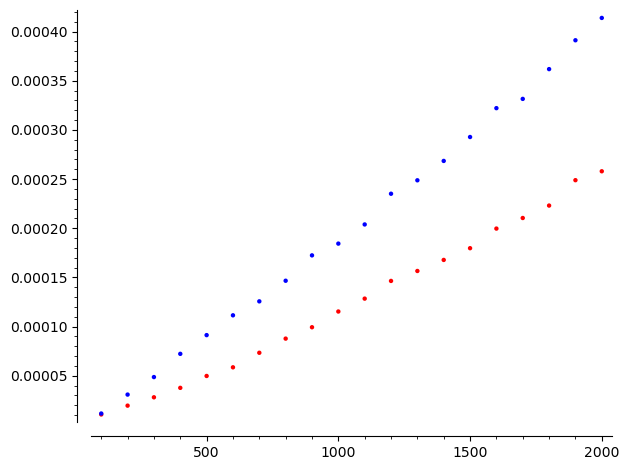

In [20]:
# vykreslíme grafy
p1 = points(res_cykl, rgbcolor=(1,0,0))
p2 = points(res_rekur, rgbcolor=(0,0,1))

show(p1+p2)

In [29]:
# následující kus kódu naměřenými hodnotami (tj. dvojice (i, čas)) proloží přímku, kterou uloží do proměnné l1, l2, ..
var('k1,k2')
model(x) = k1*x+k2

fit = find_fit(res_cykl, model, parameters = [k1,k2], variables = [x], solution_dict = True)
a, b = fit[k1],fit[k2]
l1 = plot(a*x+b, (x,100,2000), rgbcolor=(1,0,0))

fit = find_fit(res_rekur, model, parameters = [k1,k2], variables = [x], solution_dict = True)
a,b = fit[k1],fit[k2]
l2 = plot(a*x+b, (x,100,2000), rgbcolor=(0,0,1))

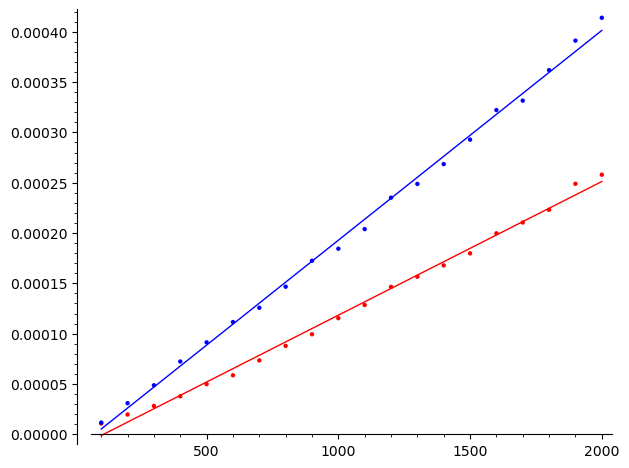

In [30]:
# vykreslení grafů i s lineární regresí
show(p1+p2+l1+l2)

# Operace s čísly v bázi _B_

In [40]:
# funkce pro sčítání
def secti(k, l, B):
    len_k, len_l = map(len, (k, l))
    common_len = max(len_k, len_l)
    target = []
    k += [0]*(common_len - len_k)
    l += [0]*(common_len - len_l)
    overflow = 0
    for dk, dl in zip(k, l):
        new = dk + dl + overflow
        overflow, new = divmod(new, B)
        target.append(new)
    if overflow:
        target.append(overflow)
    return target

In [42]:
# pozor na to, že cifry se zadávají v opačném pořadí, než se obvykle píšou
secti([4, 7, 3], [9, 5, 8, 7, 2], 10)

[3, 3, 2, 8, 2]

In [43]:
374+27859

28233

In [143]:
# funkce pro odečítání k-l; vrací navíc bool, který říká, jestli jsme se dostali do mínusu.
def odecti(k, l, B):
    len_k, len_l = map(len, (k, l))
    common_len = max(len_k, len_l)
    target = []
    k += [0]*(common_len - len_k)
    l += [0]*(common_len - len_l)
    minus = False
    for dk, dl in reversed(list(zip(k, l))):
        if dl != dk:
            minus = dl > dk
            break
    if minus:
        k, l = l, k
    underflow = 0
    for dk, dl in zip(k, l):
        new = dk - dl + underflow
        if new < 0:
            new += B
            underflow = -1
        else:
            underflow = 0
        target.append(new)
    # odstranění nul na konci
    while target and (not target[-1]):
        del target[-1]
    return minus, target

In [92]:
odecti(531.digits(10), 777.digits(10), 10)

(True, [6, 4, 2])

In [57]:
531-777

-246

In [62]:
# funkce pro násobení cifrou (je napsaná tak, že "cifra" může být i větší než B)
def nasob_cifrou(a, c, B):
    target = []
    overflow = 0
    for da in a:
        new = da * c + overflow
        overflow, new = divmod(new, B)
        target.append(new)
    while overflow:
        overflow, new = divmod(overflow, B)
        target.append(new)
    return target

In [60]:
nasob_cifrou(725.digits(10), 3, 10)

[5, 7, 1, 2]

In [61]:
725*3

2175

In [63]:
# školské násobení
def nasob_skolne(k, l, B):
    mezisoucet = []
    for i, dk in enumerate(k):
        soucin = nasob_cifrou(l, dk, B)
        soucin = [0]*i + soucin
        mezisoucet = secti(mezisoucet, soucin, B)
    return mezisoucet

In [65]:
nasob_skolne(3153.digits(10), 917.digits(10), 10)

[1, 0, 3, 1, 9, 8, 2]

In [66]:
3153*917

2891301

In [135]:
def nasob_karacuba(k, l, B):
    if len(l) < 4:
        return nasob_skolne(k, l, B)
    elif len(k) < 4:
        return nasob_skolne(l, k, B)
    n = max(len(k), len(l)) // 2
    k1, k0 = k[n:], k[:n]
    l1, l0 = l[n:], l[:n]
    k1l1 = nasob_karacuba(k1, l1, B) # [0]*(2*n) +
    k0l0 = nasob_karacuba(k0, l0, B)
    k_minus, k_diff = odecti(k0, k1, B)
    l_minus, l_diff = odecti(l0, l1, B)
    mixed = secti(k1l1, k0l0, B)
    kl_diff = nasob_karacuba(k_diff, l_diff, B)
    if k_minus == l_minus:
        mixed = secti(mixed, kl_diff, B)
    else:
        _, mixed = odecti(mixed, kl_diff, B)
    return secti([0]*(2*n)+k1l1, secti(k0l0, [0]*n+mixed, B), B)

In [147]:
m = ZZ.random_element(10^100)
n = ZZ.random_element(10^100)
# m = 1250232313
# n = 29852068183
print(ZZ(nasob_karacuba(m.digits(10), n.digits(10), 10), 10))
# print(ZZ(nasob_skolne(m.digits(10), n.digits(10), 10), 10))
# print(m*n)

22459802060535640473392791830048763113408517643940661825429690540917450658036552312395516056867794662242778014163397084459351732288448479347025625751963675531520391395150733120832800138544027037575392
